In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
SEED = 42

In [4]:
def caminata_aleatoria(num_pasos, prob = 0.5, d_x = 1, d_y = 1):
    rng = np.random.default_rng()
    volados = rng.choice(
        np.array([-1, 1]),
        size=num_pasos,
        replace=True,
        p=np.array([prob, 1-prob])
    )
    caminata = np.zeros(num_pasos)
    caminata[0] = volados[0]
    for i in range(1, num_pasos):
        caminata[i] = caminata[i-1] + volados[i]
    
    return caminata 

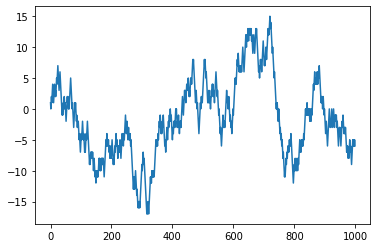

In [ ]:
plt.plot(caminata_aleatoria(1_000))

In [5]:
caminatas = np.array([caminata_aleatoria(100) for _ in range(5_000)])

In [6]:
caminatas.shape

(5000, 100)

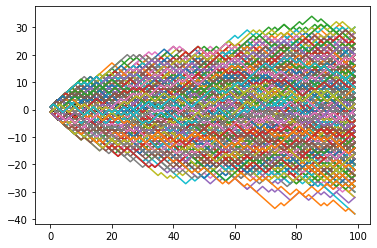

In [7]:
for caminata in caminatas:
    plt.plot(caminata)

In [38]:
HIST_BIN = np.arange(-50, 50, 2)

In [43]:
from scipy.special import comb
from scipy.stats import norm

In [54]:
def densidad_caminata(N):
    support = range(-N, N, 2)
    total = 1/2**N
    return np.array([comb(N, (N-m)/2, exact=True)*total for m in support])

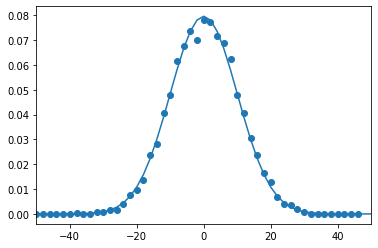

In [58]:
counts, _ = np.histogram(caminatas[:, 99], bins=HIST_BIN)
plt.xlim(-50, 50)
plt.scatter(HIST_BIN[:-1], counts/5_000)
plt.plot(np.arange(-100, 100, 2), densidad_caminata(100))

In [41]:
u = 2 * norm.pdf(HIST_BIN[:-1], 0, 10)

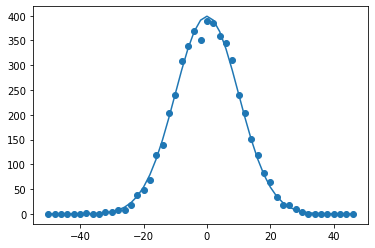

In [59]:
counts, _ = np.histogram(caminatas[:, 99], bins=HIST_BIN)
plt.scatter(HIST_BIN[:-1], counts)

plt.plot(HIST_BIN[:-1], 5_000*u )